# [NLTK Book CH 1](https://www.nltk.org/book/ch01.html)
Remember to export as html

In [1]:
import nltk

In [2]:
nltk.download('book')

[nltk_data] Downloading collection 'book'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /Users/galois/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package brown to
[nltk_data]    |     /Users/galois/nltk_data...
[nltk_data]    |   Package brown is already up-to-date!
[nltk_data]    | Downloading package chat80 to
[nltk_data]    |     /Users/galois/nltk_data...
[nltk_data]    |   Package chat80 is already up-to-date!
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     /Users/galois/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package conll2000 to
[nltk_data]    |     /Users/galois/nltk_data...
[nltk_data]    |   Package conll2000 is already up-to-date!
[nltk_data]    | Downloading package conll2002 to
[nltk_data]    |     /Users/galois/nltk_data...
[nltk_data]    |   Package conll2002 is already up-to-date!
[nltk_data]    | Downloading package depend

True

# CH 1

In [3]:
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [4]:
# https://avidml.wordpress.com/2017/08/05/natural-language-processing-concordance/
text1.concordance('singular', width=150, lines=10)

Displaying 9 of 9 matches:
enlarge the circle of his acquaintances . All this struck me as mighty singular ; yet , upon second thoughts , there was something almost sublime in i
 coming home for it . He has a quiver of ' em ." I was struck with the singular posture he maintained . Upon each side of the Pequod ' s quarter deck 
ly looked to see them again directly in advance of our bows . For that singular craft at times evinced by the Sperm Whale when , sounding with his hea
 were fairly crossed , and instantly , then , in accordance with their singular ways , shoals of small harmless fish , that for some days before had b
ferent sort . Pulling an oar in the Jeroboam ' s boat , was a man of a singular appearance , even in that wild whaling life where individual notabilit
 , the same skeleton was carried to Italy in triumph . What seems most singular and suggestively important in this story , is this : it was from Joppa
body , and then rapidly sprung backwards , it is this which gives t

In [5]:
text1.similar('monstrous')

true contemptible christian abundant few part mean careful puzzled
mystifying passing curious loving wise doleful gamesome singular
delightfully perilous fearless


In [6]:
text2.similar('monstrous')

very so exceedingly heartily a as good great extremely remarkably
sweet vast amazingly


In [7]:
text2.common_contexts(['beautiful', 'precious'])

No common contexts were found


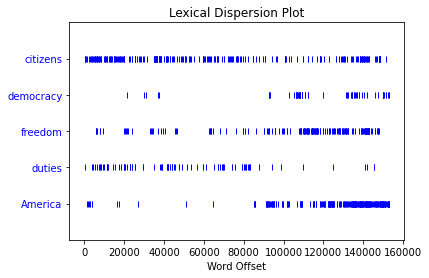

In [8]:
text4.dispersion_plot(["citizens", "democracy", "freedom", "duties", "America"])

In [9]:
# words + punctuation symbols = tokens
# word type = form or spelling of a word independent of its position
# item type = word type or punctuation type

from typing import List, Union
def lex_diversity(text: Union[List, nltk.Text]) -> float:
    return round(len(set(text1))/len(text1),3)

lex_diversity(text1)

0.074

In [10]:
frequency = nltk.FreqDist(text1)

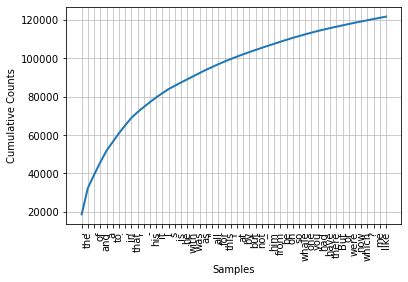

<AxesSubplot:xlabel='Samples', ylabel='Cumulative Counts'>

In [12]:
frequency.plot(50, cumulative=True)

In [26]:
# hapaxes -- unique words

long_words = [w for w in set(text1) if len(w) > 15]
frequent_long_words = [w for w in set(text1) if len(w) > 15 and frequency[w] > 10]

In [29]:
# A characteristic of collocations is that they are resistant to substitution with words that have similar senses; 
# for example, maroon wine sounds definitely odd.
from nltk.util import bigrams
list(bigrams(['more', 'is', 'said', 'than', 'done']))

[('more', 'is'), ('is', 'said'), ('said', 'than'), ('than', 'done')]

In [30]:
# top 20 co-locations
text1.collocations()

Sperm Whale; Moby Dick; White Whale; old man; Captain Ahab; sperm
whale; Right Whale; Captain Peleg; New Bedford; Cape Horn; cried Ahab;
years ago; lower jaw; never mind; Father Mapple; cried Stubb; chief
mate; white whale; ivory leg; one hand


In [32]:
# analysis of word length might help us understand differences between authors, genres, or languages.

nltk.FreqDist([len(w) for w in text1])


FreqDist({3: 50223, 1: 47933, 4: 42345, 2: 38513, 5: 26597, 6: 17111, 7: 14399, 8: 9966, 9: 6428, 10: 3528, ...})

In [ ]:
# Example	Description
# fdist = FreqDist(samples)	create a frequency distribution containing the given samples
# fdist[sample] += 1	increment the count for this sample
# fdist['monstrous']	count of the number of times a given sample occurred
# fdist.freq('monstrous')	frequency of a given sample
# fdist.N()	total number of samples
# fdist.most_common(n)	the n most common samples and their frequencies
# for sample in fdist:	iterate over the samples
# fdist.max()	sample with the greatest count
# fdist.tabulate()	tabulate the frequency distribution
# fdist.plot()	graphical plot of the frequency distribution
# fdist.plot(cumulative=True)	cumulative plot of the frequency distribution
# fdist1 |= fdist2	update fdist1 with counts from fdist2
# fdist1 < fdist2	test if samples in fdist1 occur less frequently than in fdist2